<a href="https://colab.research.google.com/github/pharringtonp19/business-analytics/blob/main/notebooks/Data_Manipulation_One.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Clone Business Analytics Repository**

In [ ]:
!git clone https://github.com/pharringtonp19/business-analytics.git

fatal: destination path 'business-analytics' already exists and is not an empty directory.


### **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **Read In the Dataset**

In [ ]:
# Don't worry about understanding these lines of code!
df = pd.read_excel(io='/content/business-analytics/datasets/Household_Debt_and_Credit.xlsx',
                   sheet_name='Page 3 Data',
                   skiprows=3)
df = df.rename(columns={'Unnamed: 0' : 'Period'}) # Rename column
df['Period'] = df['Period'].apply(lambda x: '20'+x[:2]+x[3:])
df['Period'] = pd.PeriodIndex(df['Period'], freq='Q').astype('datetime64[ns]')

### **Columns**

In [ ]:
df.columns

Index(['Period', 'Mortgage', 'HE Revolving', 'Auto Loan', 'Credit Card',
       'Student Loan', 'Other', 'Total'],
      dtype='object')

### **Visualize the Dataset**

In [ ]:
df.head()

,Period,Mortgage,HE Revolving,Auto Loan,Credit Card,Student Loan,Other,Total
0,2003-01-01,4.942,0.242,0.641,0.688,0.2407,0.4776,7.2313
1,2003-04-01,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839
2,2003-07-01,5.183,0.269,0.684,0.693,0.2488,0.4773,7.5551
3,2003-10-01,5.660,0.302,0.704,0.698,0.2529,0.4486,8.0655
4,2004-01-01,5.840,0.328,0.720,0.695,0.2598,0.4465,8.2893


### **Plotting**

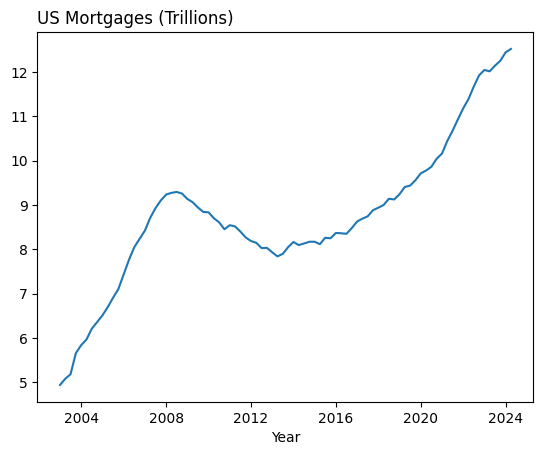

In [ ]:
plt.plot(df['Period'], df['Mortgage'])
plt.title('US Mortgages (Trillions)', loc='left')
plt.xlabel('Year')
plt.show()

### **Version 1**

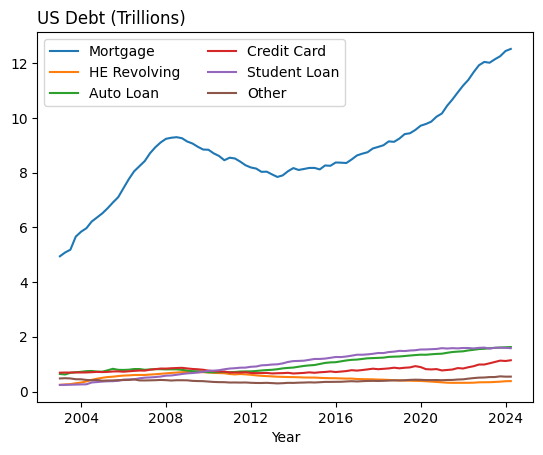

In [ ]:
for col in df.columns[1:-1]:
  plt.plot(df['Period'], df[col], label=col)

  plt.xlabel('Year')
plt.title('US Debt (Trillions)', loc='left')
plt.legend(loc='upper left', ncols=2)
plt.show()

### **Verion 2**

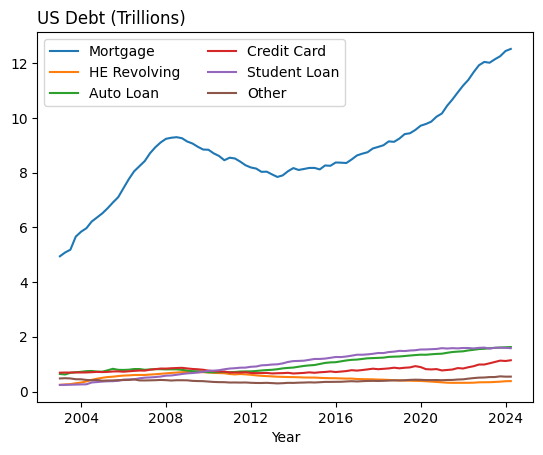

In [ ]:
for col in df.loc[:, 'Mortgage':'Other'].columns:
    plt.plot(df['Period'], df[col], label=col)

plt.xlabel('Year')
plt.title('US Debt (Trillions)', loc='left')
plt.legend(loc='upper left', ncols=2)
plt.show()

### **Scatter Plot**

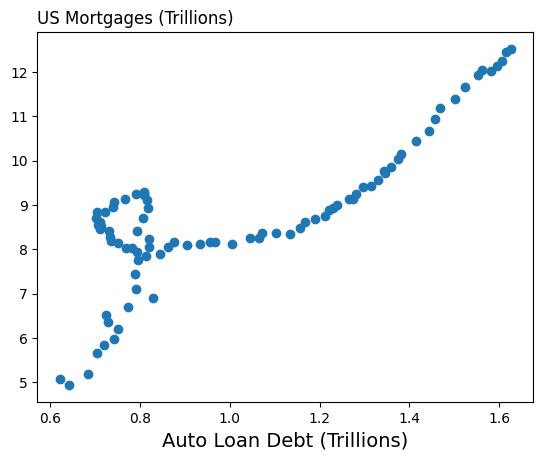

In [ ]:
plt.scatter(df['Auto Loan'], df['Mortgage'])
plt.title('US Mortgages (Trillions)', loc='left')
plt.xlabel('Auto Loan Debt (Trillions)', size=14)
plt.show()

### **Correlation Coefficient**

In [ ]:
df['Auto Loan'].corr(df['Mortgage'])

0.8157273824415219

### **For Loop**

In [ ]:
results = []
cols = df.loc[:, 'Mortgage':'Other'].columns
for col in cols:
  inner_result = []
  for col2 in cols:
    inner_result.append(df[col].corr(df[col2]))
  results.append(inner_result)

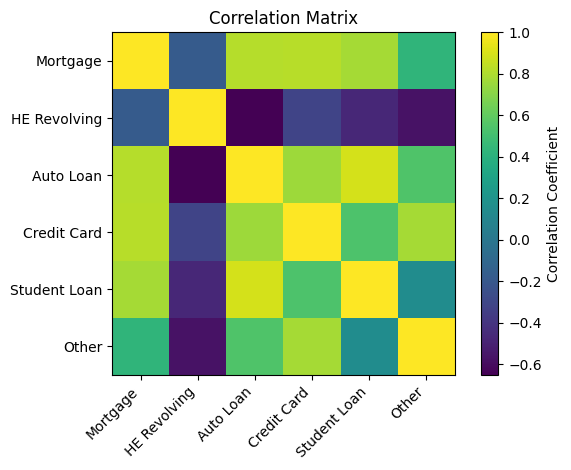

In [ ]:
plt.imshow(results)
plt.colorbar(label='Correlation Coefficient')
plt.xticks(ticks=np.arange(len(cols)), labels=cols, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(cols)), labels=cols)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()